In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Importing my Clean Dataset

In [7]:
df = pd.read_csv('Car_Price_clean_df.csv')
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-bined,fuel-type-diesel,fuel-type-gas,Std-aspiration,Turbo-aspiration
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,low,0,1,1,0


### Find the correlation between the following columns:

In [9]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


## Positive (strong) Linear Relationship


(0.0, 53644.730289698964)

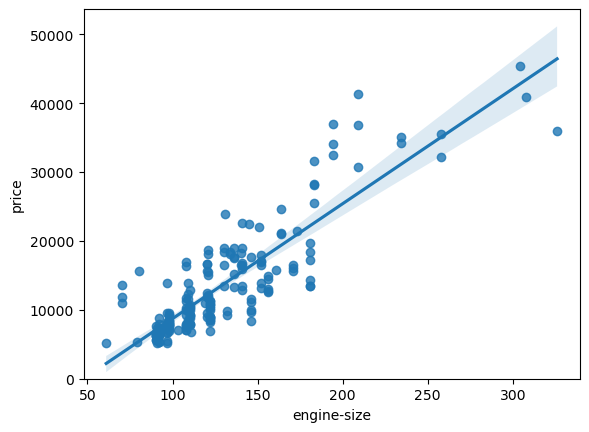

In [11]:
sns.regplot(x='engine-size', y='price' , data=df)
plt.ylim(0,)

<Axes: xlabel='highway-mpg', ylabel='price'>

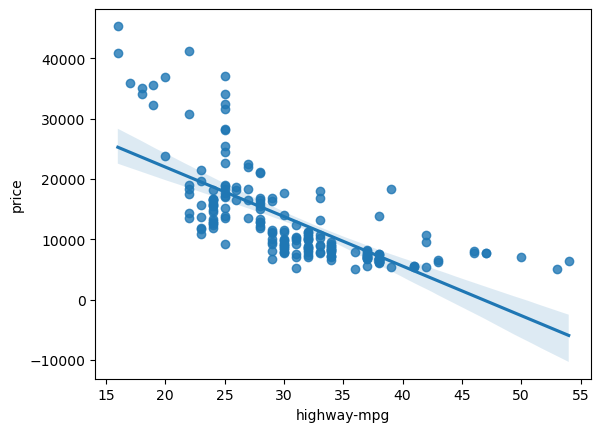

In [55]:
sns.regplot(x='highway-mpg', y='price', data=df)

## Weak Linear Relationship


<Axes: xlabel='peak-rpm', ylabel='price'>

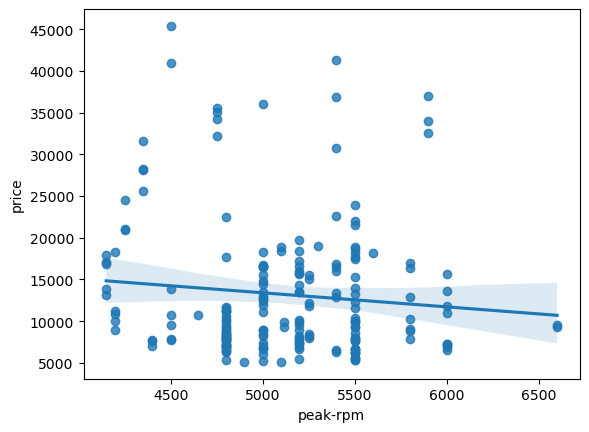

In [59]:
sns.regplot(x="peak-rpm", y="price", data=df)

## Visualize categorical variables

 </p> A good way to visualize categorical variables is by using boxplots.</p>

<Axes: xlabel='body-style', ylabel='price'>

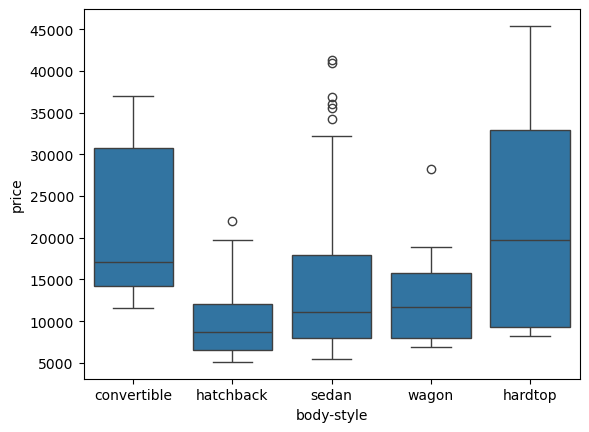

In [14]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


<Axes: xlabel='engine-location', ylabel='price'>

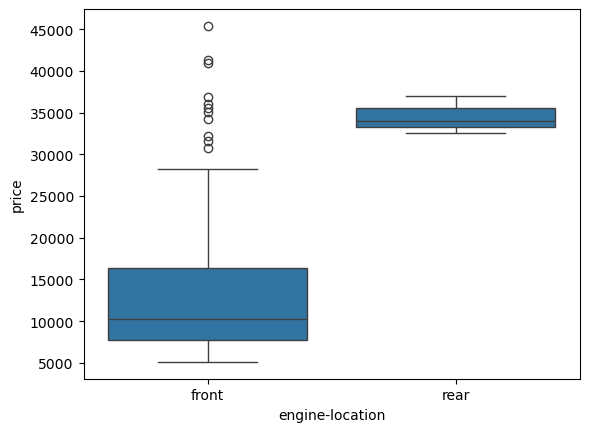

In [17]:
sns.boxplot(x='engine-location', y='price' , data =df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


In [25]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<Axes: xlabel='drive-wheels', ylabel='price'>

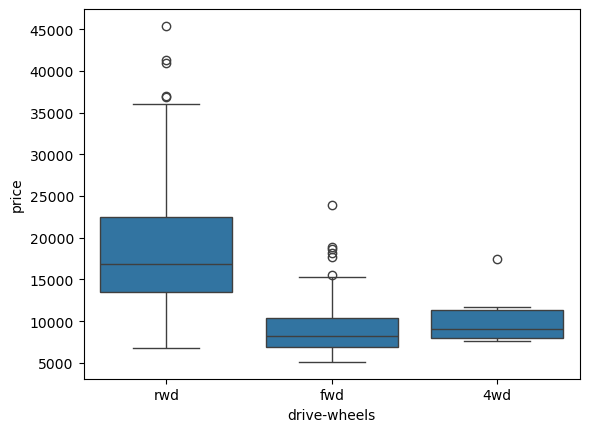

In [20]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>


In [46]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
# Creating a Pivot table

In [41]:
grouped_pivot = df_group_one.pivot(index='drive-wheels',columns='body-style').fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

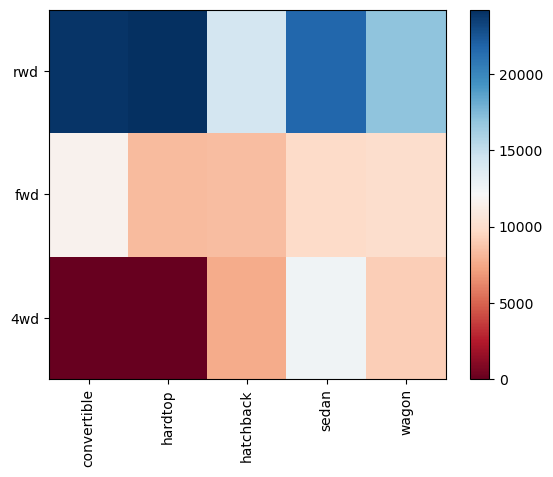

In [52]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [1]:
### This Function computes and interprets Pearson correlation between two variables, including significance testing

def calculate_correlation(df, x_col, y_col):
    pearson_coef, p_value = stats.pearsonr(df[x_col], df[y_col])
    
    print(f"\n Correlation between {x_col} and {y_col}:")
    print(f"   Pearson Coefficient = {pearson_coef:.3f}")
    print(f"   P-value = {p_value:.5f}")

    # Interpret correlation strength
    if pearson_coef == 1:
        corr_text = "Perfect positive linear correlation"
    elif pearson_coef > 0.5:
        corr_text = "Strong positive correlation"
    elif pearson_coef > 0:
        corr_text = "Weak positive correlation"
    elif pearson_coef < -0.5:
        corr_text = "Strong negative correlation"
    elif pearson_coef < 0:
        corr_text = "Weak negative correlation"
    else:
        corr_text = "No correlation"
    
    # Interpret significance
    if p_value < 0.001:
        sig_text = "Strong evidence of significance"
    elif p_value < 0.05:
        sig_text = "Moderate evidence of significance"
    elif p_value < 0.1:
        sig_text = "Weak evidence of significance"
    else:
        sig_text = "No significant evidence"
    
    print(f" {corr_text}")
    print(f" {sig_text}")

    #return {"pearson_coef": pearson_coef, "p_value": p_value,
            #"correlation": corr_text, "significance": sig_text}


In [127]:
calculate_correlation (df, 'wheel-base','price')


 Correlation between wheel-base and price:
   Pearson Coefficient = 0.585
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [135]:
calculate_correlation (df,'horsepower','price')


 Correlation between horsepower and price:
   Pearson Coefficient = 0.810
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [140]:
calculate_correlation (df,'engine-size','price')


 Correlation between engine-size and price:
   Pearson Coefficient = 0.872
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [20]:
calculate_correlation (df,'peak-rpm','price')


 Correlation between peak-rpm and price:
   Pearson Coefficient = -0.102
   P-value = 0.15148
 Weak negative correlation
 No significant evidence


In [22]:
calculate_correlation (df,'bore','price')


 Correlation between bore and price:
   Pearson Coefficient = 0.543
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [24]:
calculate_correlation (df, 'length','price')


 Correlation between length and price:
   Pearson Coefficient = 0.691
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [26]:
calculate_correlation (df, 'width','price')


 Correlation between width and price:
   Pearson Coefficient = 0.751
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [28]:
calculate_correlation (df, 'curb-weight','price')


 Correlation between curb-weight and price:
   Pearson Coefficient = 0.834
   P-value = 0.00000
 Strong positive correlation
 Strong evidence of significance


In [30]:
calculate_correlation (df,'city-mpg','price')


 Correlation between city-mpg and price:
   Pearson Coefficient = -0.687
   P-value = 0.00000
 Strong negative correlation
 Strong evidence of significance


In [32]:
calculate_correlation (df,'highway-mpg','price')


 Correlation between highway-mpg and price:
   Pearson Coefficient = -0.705
   P-value = 0.00000
 Strong negative correlation
 Strong evidence of significance


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
